* https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store

In [1]:
import pandas as pd
import time
import re
from tqdm import tqdm
from glob import glob

In [3]:
df = pd.read_parquet("2019-Oct-Nov-parquet.parquet")

In [4]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-30 15:45:03 UTC,view,1004798,2053013555631882655,electronics.smartphone,haier,128.679993,562235376,3779d282-4198-4a3e-954d-4095f4c82ffe
1,2019-11-30 15:45:03 UTC,view,4000194,2053013566142809077,construction.tools.generator,scarlett,67.440002,568416725,e9a9a971-026c-44fa-9c5f-2ee1391f546c
2,2019-11-30 15:45:03 UTC,view,22400115,2053013554474254687,electronics.audio.microphone,peavey,178.610001,546201360,50264ddf-7727-4e38-bbbe-0f037aaa7398
3,2019-11-30 15:45:03 UTC,view,5600301,2053013562913194819,None,braun,80.309998,576995083,76217dc4-27b0-48d8-86d6-4308472e710a
4,2019-11-30 15:45:03 UTC,view,1801858,2053013554415534427,electronics.video.tv,tcl,217.710007,514039751,dcfd660a-b656-4881-b72f-935b29332f70


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109950743 entries, 0 to 109950742
Data columns (total 10 columns):
 #   Column            Dtype              
---  ------            -----              
 0   event_time        datetime64[ns, UTC]
 1   event_type        object             
 2   product_id        uint32             
 3   category_id       uint64             
 4   category_code     object             
 5   brand             object             
 6   price             float32            
 7   user_id           uint32             
 8   user_session      object             
 9   first_event_time  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float32(1), object(4), uint32(2), uint64(1)
memory usage: 7.0+ GB


In [11]:
df = df[["event_time", "user_id"]].copy()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109950743 entries, 0 to 109950742
Data columns (total 2 columns):
 #   Column      Dtype              
---  ------      -----              
 0   event_time  datetime64[ns, UTC]
 1   user_id     uint32             
dtypes: datetime64[ns, UTC](1), uint32(1)
memory usage: 1.2 GB


In [13]:
df.event_time.dtypes

datetime64[ns, UTC]

In [15]:
df["first_event_time"] = df.groupby("user_id")["event_time"].transform("min")

In [16]:
df

,event_time,user_id,first_event_time
0,2019-11-30 15:45:03+00:00,562235376,2019-10-20 12:14:58+00:00
1,2019-11-30 15:45:03+00:00,568416725,2019-11-07 04:50:46+00:00
2,2019-11-30 15:45:03+00:00,546201360,2019-10-13 09:27:50+00:00
3,2019-11-30 15:45:03+00:00,576995083,2019-11-27 02:45:56+00:00
4,2019-11-30 15:45:03+00:00,514039751,2019-10-16 16:49:53+00:00
...,...,...,...
109950738,2019-11-26 14:26:56+00:00,514975897,2019-10-01 14:41:34+00:00
109950739,2019-11-26 14:26:56+00:00,519240821,2019-11-07 15:43:24+00:00
109950740,2019-11-26 14:26:56+00:00,512971425,2019-11-15 01:20:35+00:00
109950741,2019-11-26 14:26:56+00:00,392744645,2019-11-26 14:25:04+00:00


In [26]:
df["cohort_days"] = (df["event_time"] - df["first_event_time"]).dt.days

<Axes: xlabel='cohort_days'>

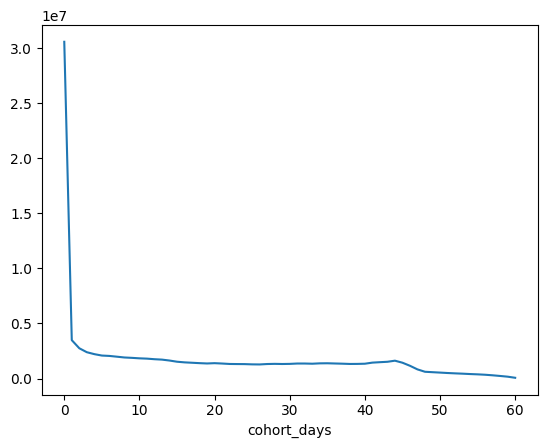

In [33]:
df["cohort_days"].value_counts().sort_index().plot()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109950743 entries, 0 to 109950742
Data columns (total 6 columns):
 #   Column                 Dtype              
---  ------                 -----              
 0   event_time             datetime64[ns, UTC]
 1   user_id                uint32             
 2   first_event_time       datetime64[ns, UTC]
 3   cohort_days            int64              
 4   first_event_month_day  object             
 5   first_day              object             
dtypes: datetime64[ns, UTC](2), int64(1), object(2), uint32(1)
memory usage: 4.5+ GB


In [47]:
%time df["first_day"] = df["first_event_time"].astype(str).str[5:10]

CPU times: user 6min 31s, sys: 12.1 s, total: 6min 43s
Wall time: 6min 46s


In [53]:
%time cohort_count = df.groupby(["first_day", "cohort_days"])["user_id"].nunique().unstack()

CPU times: user 56.1 s, sys: 6.83 s, total: 1min 2s
Wall time: 1min 7s


In [65]:
pd.to_numeric?

In [ ]:
df["cohort_days"] = pd.to_numeric(df["cohort_days"], downcast="unsigned")
df["cohort_days"].info()

In [54]:
cohort_count

cohort_days,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
first_day,,,,,,,,,,,,,,,,,,,,,
10-01,190188.0,28390.0,26757.0,25987.0,22547.0,21758.0,22143.0,21975.0,20902.0,22084.0,...,13332.0,12794.0,12516.0,12702.0,13307.0,14001.0,13945.0,14550.0,14353.0,7885.0
10-02,152103.0,19495.0,18235.0,15344.0,14733.0,14806.0,15131.0,14318.0,14902.0,14411.0,...,8849.0,8595.0,8886.0,9239.0,9619.0,9576.0,10067.0,9837.0,5522.0,NaN
10-03,124262.0,15127.0,12274.0,11450.0,11587.0,11822.0,10972.0,11450.0,11117.0,10751.0,...,6716.0,6724.0,7172.0,7259.0,7452.0,7919.0,7729.0,4083.0,NaN,NaN
10-04,143216.0,14612.0,12562.0,12320.0,12408.0,11532.0,12649.0,12179.0,11753.0,11725.0,...,7179.0,7658.0,8155.0,7925.0,8375.0,8321.0,4429.0,NaN,NaN,NaN
10-05,124922.0,11519.0,9813.0,9578.0,8860.0,9365.0,9514.0,9436.0,8960.0,8867.0,...,5822.0,5897.0,5922.0,6361.0,6498.0,3496.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11-26,58918.0,3938.0,3359.0,2732.0,1247.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11-27,59748.0,4303.0,3219.0,1348.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11-28,60338.0,4093.0,1610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
cohort_count.style.background_gradient(axis=None).format("{:,.0f}")

cohort_days,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
first_day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10-01,"190,188","28,390","26,757","25,987","22,547","21,758","22,143","21,975","20,902","22,084","20,942","20,283","21,207","21,415","20,866","19,244","19,323","19,004","17,971","17,661","17,308","16,820","16,148","16,599","16,590","15,082","15,257","15,031","14,488","14,441","15,956","16,945","16,847","18,318","18,867","17,983","18,134","17,745","16,863","16,207","16,899","17,100","16,750","17,422","23,853","28,540","29,344","23,575","16,353","14,678","14,026","13,332","12,794","12,516","12,702","13,307","14,001","13,945","14,550","14,353","7,885"
10-02,"152,103","19,495","18,235","15,344","14,733","14,806","15,131","14,318","14,902","14,411","13,765","14,596","14,498","14,547","13,119","13,171","13,020","12,201","12,063","11,799","11,524","10,838","11,072","11,162","10,116","10,341","10,104","9,985","10,062","11,037","11,544","11,547","12,870","13,445","12,508","12,661","12,509","11,827","11,261","11,649","11,928","11,921","12,159","16,762","20,306","21,089","16,761","11,410","10,153","9,704","9,269","8,849","8,595","8,886","9,239","9,619","9,576","10,067","9,837","5,522",nan
10-03,"124,262","15,127","12,274","11,450","11,587","11,822","10,972","11,450","11,117","10,751","11,168","11,400","11,022","10,066","10,287","10,078","9,670","9,508","8,941","8,743","8,480","8,673","8,615","7,779","8,005","7,858","7,510","7,503","8,370","8,845","9,145","9,944","10,273","9,485","9,578","9,600","9,039","8,776","9,046","9,308","8,991","9,451","13,120","15,792","16,422","12,951","8,668","7,891","7,469","7,014","6,865","6,716","6,724","7,172","7,259","7,452","7,919","7,729","4,083",nan,nan
10-04,"143,216","14,612","12,562","12,320","12,408","11,532","12,649","12,179","11,753","11,725","12,297","11,990","10,785","10,907","11,034","10,043","9,870","9,476","9,316","8,881","9,296","9,470","8,302","8,222","8,054","7,741","7,978","8,843","9,545","9,819","10,689","11,161","10,527","10,745","10,608","9,926","9,561","9,907","10,214","9,932","10,194","14,811","18,373","19,093","14,536","9,333","8,417","7,991","7,613","7,334","7,154","7,179","7,658","8,155","7,925","8,375","8,321","4,429",nan,nan,nan
10-05,"124,922","11,519","9,813","9,578","8,860","9,365","9,514","9,436","8,960","8,867","8,830","8,057","7,866","8,407","8,095","7,732","7,163","6,997","6,651","6,851","7,311","6,755","6,423","6,120","5,838","5,938","6,605","7,422","7,837","8,140","8,125","7,689","7,900","7,851","7,606","7,654","7,692","7,334","7,344","7,640","10,684","13,692","14,523","10,940","7,168","6,323","6,020","5,806","5,714","5,796","5,639","5,822","5,897","5,922","6,361","6,498","3,496",nan,nan,nan,nan
10-06,"117,020","10,279","9,115","8,293","8,476","8,238","8,427","8,046","7,747","7,761","6,866","6,912","7,192","7,147","6,982","6,360","6,054","5,818","5,900","6,074","5,913","5,687","5,234","5,259","5,237","5,664","6,273","6,617","7,103","7,114","6,740","6,835","6,791","6,610","6,568","6,659","6,552","6,430","6,677","9,234","11,631","12,562","9,686","6,372","5,532","5,277","5,022","4,850","5,075","4,923","5,009","5,221","5,231","5,598","5,578","3,067",nan,nan,nan,nan,nan
10-07,"105,832","9,891","8,172","7,984","7,518","6,941","7,068","7,137","7,054","6,403","6,220","6,187","5,993","5,914","5,755","5,656","5,213","5,308","5,346","4,733","4,886","4,740","4,509","4,686","5,064","5,251","5,504","6,113","6,460","6,000","6,052","6,034","5,600","5,403","5,653","5,901","5,554","5,738","7,904","9,947","10,533","8,292","5,542","4,904","4,694","4,469","4,246","4,048","4,343","4,377","4,638","4,534","4,894","4,822","2,536",nan,nan,nan,nan,nan,nan
10-08,"127,193","10,689","9,602","8,867","8,309","8,360","8,245","8,112","7,601","7,374","7,191","6,854","6,884","6,761","6,481","6,152","6,267","6,211","5,428","5,481","5,418","5,348","5,398","

In [60]:
cohort_ratio = cohort_count.div(cohort_count[0], axis=0)
cohort_ratio

cohort_days,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
first_day,,,,,,,,,,,,,,,,,,,,,
10-01,1.0,0.149273,0.140687,0.136638,0.118551,0.114403,0.116427,0.115544,0.109902,0.116117,...,0.070099,0.067270,0.065809,0.066787,0.069968,0.073617,0.073322,0.076503,0.075467,0.041459
10-02,1.0,0.128170,0.119886,0.100879,0.096862,0.097342,0.099479,0.094134,0.097973,0.094745,...,0.058178,0.056508,0.058421,0.060742,0.063240,0.062957,0.066185,0.064673,0.036304,NaN
10-03,1.0,0.121735,0.098775,0.092144,0.093247,0.095138,0.088297,0.092144,0.089464,0.086519,...,0.054047,0.054111,0.057717,0.058417,0.059970,0.063728,0.062199,0.032858,NaN,NaN
10-04,1.0,0.102028,0.087714,0.086024,0.086638,0.080522,0.088321,0.085039,0.082065,0.081869,...,0.050127,0.053472,0.056942,0.055336,0.058478,0.058101,0.030925,NaN,NaN,NaN
10-05,1.0,0.092210,0.078553,0.076672,0.070924,0.074967,0.076160,0.075535,0.071725,0.070980,...,0.046605,0.047205,0.047406,0.050920,0.052016,0.027985,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11-26,1.0,0.066839,0.057011,0.046370,0.021165,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11-27,1.0,0.072019,0.053876,0.022561,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11-28,1.0,0.067835,0.026683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_days', ylabel='first_day'>

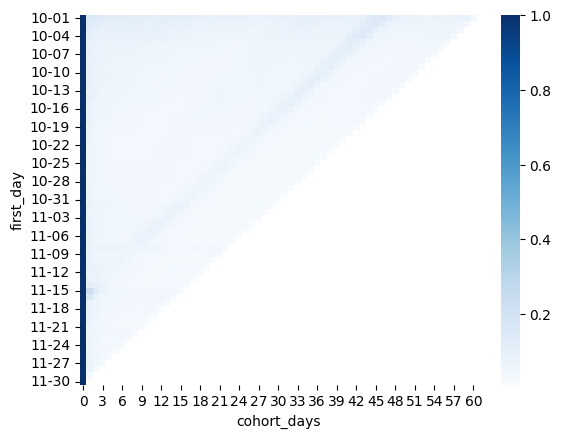

In [64]:
import seaborn as sns

sns.heatmap(cohort_ratio, cmap="Blues")